In [1]:
from graph2net.trainers import generate
from graph2net.archetypes import inception,resNet,resNeXt
from graph2net.graph_generators import show_cell, gen_cell
from graph2net.data_loaders import load_data, visualize_loader
import graph2net.notifier
from graph2net.notifier import notify_me
from graph2net.petri import create_gene_pool,run_petri, mutate_pool

from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logging

pd.options.mode.chained_assignment = None 
logging.basicConfig(filename='logs/model_testbed.log', level=logging.INFO)

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def list_flatten(l):
    return [item for sublist in l for item in sublist]

data = load_data(batch_size=256)
ground_truths = np.array(list_flatten([tgt.tolist() for img,tgt in data[1]]))

In [4]:
len(ground_truths)

10000

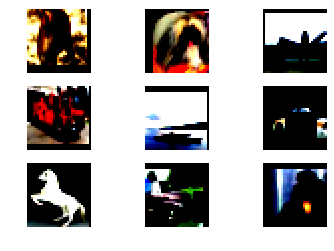

In [5]:
visualize_loader(data[0])

In [51]:
inclusions = [{"cell":inception,"genotype":'inception'},
              {"cell":resNeXt,"genotype":'resNeXt'},
              {"cell":resNet,"genotype":'resNet'}]

pool = create_gene_pool(497,node_range=[3,8],connectivity_range=[.25,.75],concat=.5,inclusions=inclusions)

In [52]:
pool

,acc_preds,adult,cell,correct,genotype,lineage,loss,mutations,name,offspring,preds,type
0,[],False,"[[0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 12.0, 0.0], ...",0,"n: 4, c: 0.723",[],0.0,0,Oneida Geneva Monticello,0,[],sum
1,[],False,"[[0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 14.0], ...",0,"n: 4, c: 0.408",[],0.0,0,Hillcrest Poland Longfellow,0,[],sum
2,[],False,"[[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 4.0], [0.0, 0....",0,"n: 7, c: 0.728",[],0.0,0,Bausch Catskill Collier,0,[],sum
3,[],False,"[[0.0, 1.0, 0.0, 0.0, 15.0], [0.0, 0.0, 8.0, 0...",0,"n: 5, c: 0.472",[],0.0,0,Polaris Neptune Amtrak,0,[],sum
4,[],False,"[[0.0, 1.0, 0.0, 0.0, 0.0, 15.0], [0.0, 0.0, 1...",0,"n: 6, c: 0.507",[],0.0,0,Neumann Philadelphia Hodgkin,0,[],sum
5,[],False,"[[0.0, 1.0, 0.0, 1.0, 0.0], [0.0, 0.0, 14.0, 0...",0,"n: 5, c: 0.671",[],0.0,0,Selectric Lanka British,0,[],sum
6,[],False,"[[0.0, 1.0, 0.0, 0.0, 6.0, 0.0, 0.0], [0.0, 0....",0,"n: 7, c: 0.316",[],0.0,0,Offenbach Epstein Prof,0,[],sum
7,[],False,"[[0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 8.0, 0....",0,"n: 5, c: 0.273",[],0.0,0,McMullen Halverson Czerniak,0,[],concat
8,[],False,"[[0.0, 5.0, 4.0, 0.0, 0.0], [1.0, 0.0, 11.0, 0...",0,"n: 5, c: 0.607",[],0.0,0,Pillsbury Seoul Gothic,0,[],concat
9,[],False,"[[0.0, 10.0, 0.0, 0.0, 9.0], [0.0, 0.0, 8.0, 0...",0,"n: 5, c: 0.44",[],0.0,0,Byronic Colosseum Protista,0,[],sum


In [53]:
def get_ensembling(adult_df):
    valids = adult_df[adult_df['correct']>0]
    top_n_mean=(valids['preds'].cumsum())/(np.arange(len(valids))+1)
    top_n_preds = [np.argmax(x,1) for x in top_n_mean]
    top_n_corrects = [np.sum(x==ground_truths) for x in top_n_preds]
    top_n_corrects += [0]*(len(adult_df)-len(valids))
    adult_df['top_n_corrects']=top_n_corrects
    return adult_df

In [54]:
pool

,acc_preds,adult,cell,correct,genotype,lineage,loss,mutations,name,offspring,preds,type
0,[],False,"[[0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 12.0, 0.0], ...",0,"n: 4, c: 0.723",[],0.0,0,Oneida Geneva Monticello,0,[],sum
1,[],False,"[[0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 14.0], ...",0,"n: 4, c: 0.408",[],0.0,0,Hillcrest Poland Longfellow,0,[],sum
2,[],False,"[[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 4.0], [0.0, 0....",0,"n: 7, c: 0.728",[],0.0,0,Bausch Catskill Collier,0,[],sum
3,[],False,"[[0.0, 1.0, 0.0, 0.0, 15.0], [0.0, 0.0, 8.0, 0...",0,"n: 5, c: 0.472",[],0.0,0,Polaris Neptune Amtrak,0,[],sum
4,[],False,"[[0.0, 1.0, 0.0, 0.0, 0.0, 15.0], [0.0, 0.0, 1...",0,"n: 6, c: 0.507",[],0.0,0,Neumann Philadelphia Hodgkin,0,[],sum
5,[],False,"[[0.0, 1.0, 0.0, 1.0, 0.0], [0.0, 0.0, 14.0, 0...",0,"n: 5, c: 0.671",[],0.0,0,Selectric Lanka British,0,[],sum
6,[],False,"[[0.0, 1.0, 0.0, 0.0, 6.0, 0.0, 0.0], [0.0, 0....",0,"n: 7, c: 0.316",[],0.0,0,Offenbach Epstein Prof,0,[],sum
7,[],False,"[[0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 8.0, 0....",0,"n: 5, c: 0.273",[],0.0,0,McMullen Halverson Czerniak,0,[],concat
8,[],False,"[[0.0, 5.0, 4.0, 0.0, 0.0], [1.0, 0.0, 11.0, 0...",0,"n: 5, c: 0.607",[],0.0,0,Pillsbury Seoul Gothic,0,[],concat
9,[],False,"[[0.0, 10.0, 0.0, 0.0, 9.0], [0.0, 0.0, 8.0, 0...",0,"n: 5, c: 0.44",[],0.0,0,Byronic Colosseum Protista,0,[],sum


In [ ]:
for generation in range(1):
    print("=== GENERATION {} ===".format(generation))
    #logging.info("=== GENERATION {} ===".format(generation))
    adult_df = run_petri(pool,data=data,connectivity='linear',cell_types=[1,1],scale=2,epochs=8,verbose=False,predict=True)
    adult_df = get_ensembling(adult_df)
    display(adult_df)
    adult_df.to_pickle("generations/generation_{}.pkl".format(generation))
    pool = mutate_pool(adult_df, parents=25, children=75, mutation_probability=.25)

=== GENERATION 0 ===


In [ ]:
notify_me("10 generations finished! Best model: {}, Corrects: {}".format(pool['name'].iloc[0],pool['correct'].iloc[0]))
notify_me("Best ensemble model: Corrects: {}".format(max(adult_df['top_n_corrects'])))

In [ ]:
adult_df[adult_df['correct']>=adult_df['correct'].quantile(.75)]

In [ ]:
pool